In [13]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textstat
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [14]:
# Download the punkt tokenizer models
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Read Data

In [15]:
# Load the data from json file
with open('data/pun_annotated.json') as f:
    data = json.load(f)

# Create a dataframe from the json data
df = pd.DataFrame(data)
print(df.shape)

(1899, 8)


In [16]:
# Is a Joke? Column sum in is_humor
df['is_joke_sum'] = df['Is a Joke?'].apply(sum)

# if 4 or more annotators think it is a joke, then it is a joke
MIN_ANNOTATORS = 4
df['is_humor'] = df['is_joke_sum'].apply(lambda x: 1 if x >= MIN_ANNOTATORS else 0)

In [17]:
# count how many is_humor is True
is_humor = df['is_humor'].value_counts()
print(is_humor)

1    1020
0     879
Name: is_humor, dtype: int64


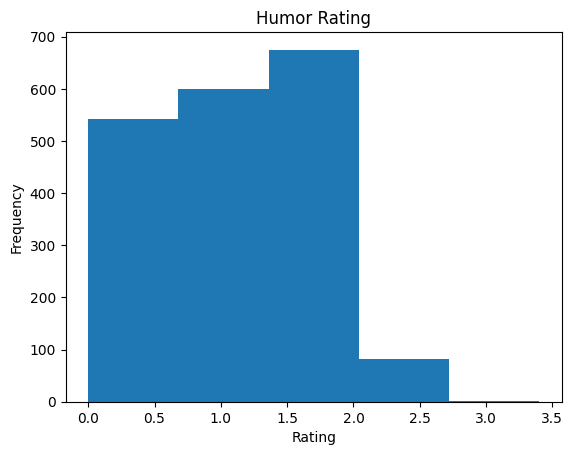

In [18]:
# avg humor rating
df['humor_rating_avg'] = df['Funniness (1-5)'].apply(np.mean)
# histogram of humor rating
plt.hist(df['humor_rating_avg'], bins=5)
plt.title('Humor Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [19]:
# 5 sample of is_humor is True
for i in range(5):
    print(df[df['is_humor'] == True].iloc[i]['text'])
    print()

KeyError: 'text'

In [122]:
# 5 sample of is_humor is True
for i in range(5):
    print(df[df['is_humor'] == False].iloc[i]['text'])
    print()

'Trabajo,' the Spanish word for work, comes from the Latin term 'trepaliare,' meaning torture.

I enrolled on some skill training and extra curricula activities that added shape to my weekends and after-work schedule. The more days passed, the more exposed I was to how blindly in love I was with an obsession. It's been months now and we are just cool as men.

Men who ejaculated 21 times or more a month had a lower risk of prostate cancer than those who ejaculated four to seven times a month, according to researchers at Harvard T.H. Chan School of Public Health.

I got REALLY angry today and it wasn't about nothing, but you're going to have to take my word for that.

A dog in Mexico named Frida saved the lives of 12 people who were trapped under rubble after an earthquake in 2017. She has identified a total of 52 bodies throughout her career and is considered a national heroine. She's officially retired.



## Tokenize

In [123]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [124]:
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.lower() not in stop_words]
    return tokens

In [125]:
# tokenization
df['tokenized_text'] = df['text'].apply(word_tokenize)

In [126]:
# standardize tokenized text
df['standardized_text'] = df['text'].apply(preprocess_text)

## Added General Characteristics

In [127]:
# count length of each joke
df['text_length'] = df['text'].apply(len)

In [128]:
# word count of each joke
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [129]:
# avg word length of each joke
df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in x.split()]))

In [130]:
# count of punctuation
df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in x if c in ['.', ',', '!', '?']]))

In [131]:
# stop words / total words
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

def calculate_stopword_ratio(tokens):
    non_stopwords = remove_stopwords(tokens)
    if len(tokens) == 0:
        return 0
    return 1 - (len(non_stopwords) / len(tokens))

df['stopword_ratio'] = df['tokenized_text'].apply(calculate_stopword_ratio)

In [132]:
def calculate_richness(tokens):
    if len(tokens) == 0:
        return 0
    return len(set(tokens)) / len(tokens)

df['richenss'] = df['standardized_text'].apply(calculate_richness)

In [133]:
def get_readability(text):
    score = textstat.automated_readability_index(text)
    return score

"""other scores:
- flesch_reading_ease
- flesch_kincaid_grade
- smog_index
- coleman_liau_index
- automated_readability_index
- dale_chall_readability_score
- linsear_write_formula
- gunning_fog
- text_standard
"""


'other scores:\n- flesch_reading_ease\n- flesch_kincaid_grade\n- smog_index\n- coleman_liau_index\n- automated_readability_index\n- dale_chall_readability_score\n- linsear_write_formula\n- gunning_fog\n- text_standard\n'

In [134]:
df['readability'] = df['text'].apply(get_readability)

In [135]:
def get_difficult_words(text):
    score = textstat.difficult_words(text) / len(text.split())
    return score

In [136]:
df['difficult_words'] = df['text'].apply(get_difficult_words)

## Plots of Characteristics

In [ ]:
def hist_compare(df, column, title):
    print(df.groupby('is_humor')[column].agg(['mean', 'min', 'max', 'std']))
    plt.hist(df[df['is_humor'] == True][column], bins=20, alpha=0.5, label='is_humor=True')
    plt.hist(df[df['is_humor'] == False][column], bins=20, alpha=0.5, label='is_humor=False')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend()
    return plt

                mean  min  max        std
is_humor                                 
0         122.351695    8  286  62.714395
1         107.076440   10  280  44.714322


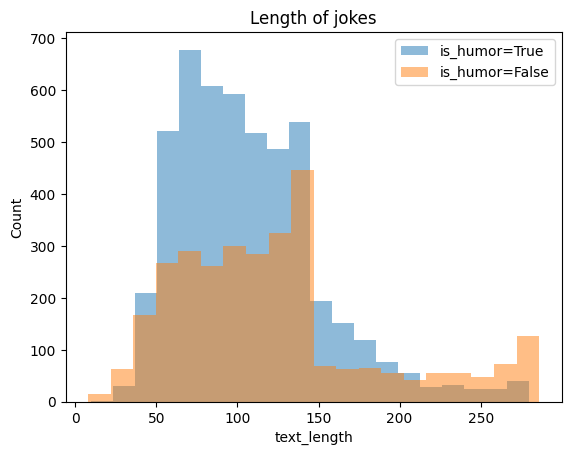

In [170]:
# 2 hist of length of jokes
hist_compare(df, 'text_length', 'Length of jokes').show()

               mean  min  max        std
is_humor                                
0         21.932855    1   63  11.166029
1         20.240268    2   57   8.590675


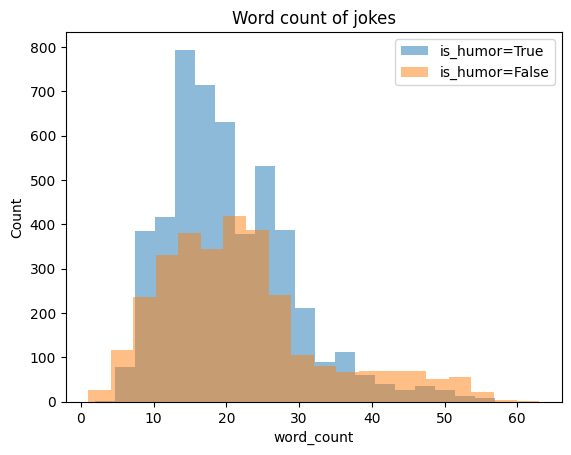

In [171]:
# 2 hist of word count of jokes
hist_compare(df, 'word_count', 'Word count of jokes').show()

              mean       min   max       std
is_humor                                    
0         4.663354  2.857143   9.0  0.685291
1         4.400999  2.700000  11.2  0.591486


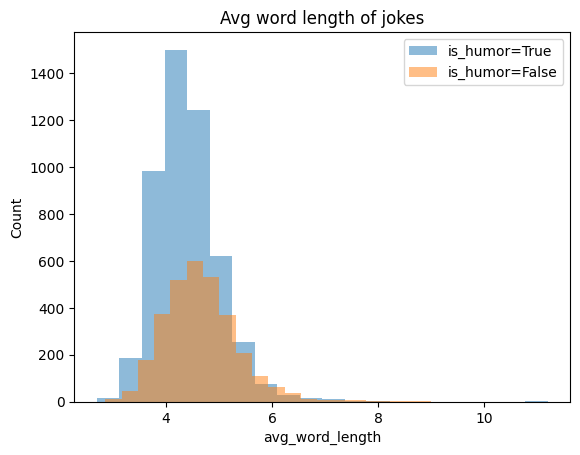

In [172]:
# 2 hist of avg word length of jokes
hist_compare(df, 'avg_word_length', 'Avg word length of jokes').show()

              mean  min  max       std
is_humor                              
0         2.678944    0   17  2.078564
1         2.580495    0   18  2.037324


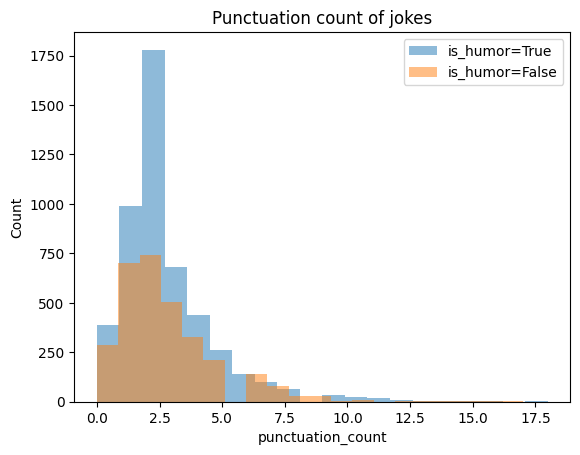

In [173]:
# 2 hist of punctuation count of jokes
hist_compare(df, 'punctuation_count', 'Punctuation count of jokes').show()

              mean       min  max       std
is_humor                                   
0         0.907072  0.083333  1.0  0.096626
1         0.912667  0.380952  1.0  0.101766


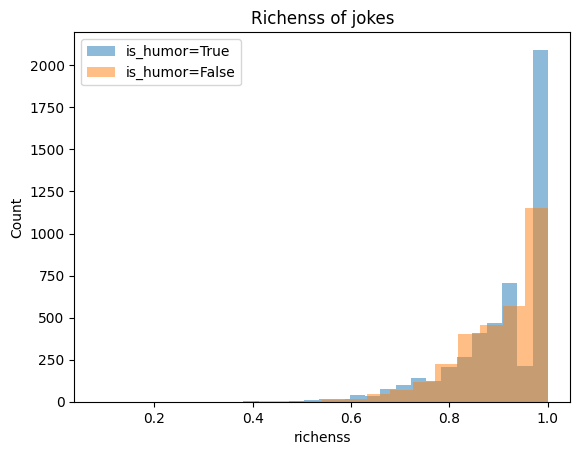

In [174]:
# 2 hist of richenss of jokes
hist_compare(df, 'richenss', 'Richenss of jokes').show()

              mean  min       max       std
is_humor                                   
0         0.379534  0.0  0.800000  0.114908
1         0.409674  0.0  0.666667  0.091620


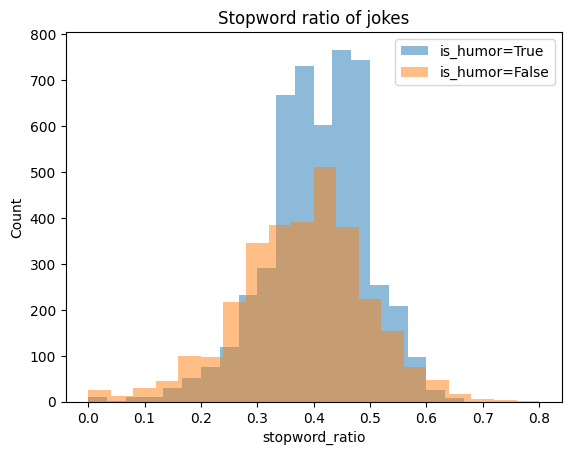

In [175]:
# 2 hist of stopword_ratio of jokes
hist_compare(df, 'stopword_ratio', 'Stopword ratio of jokes').show()

              mean  min   max       std
is_humor                               
0         7.476630 -4.5  25.6  4.382482
1         5.576237 -4.2  33.8  3.856280


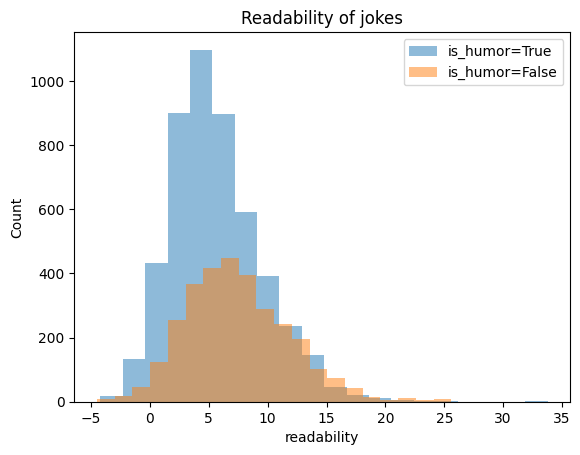

In [176]:
# 2 hist of readability of jokes
hist_compare(df, 'readability', 'Readability of jokes').show()

              mean  min  max       std
is_humor                              
0         0.161266  0.0  1.0  0.116968
1         0.133189  0.0  0.8  0.090085


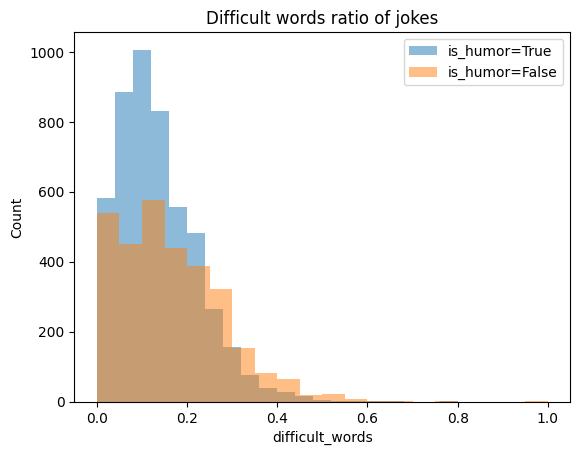

In [177]:
hist_compare(df, 'difficult_words', 'Difficult words ratio of jokes').show()

## Plots of Characteristics detailed

In [153]:
def scatter_plot(x_col, y_col , title, x_label, y_label):
    plt.figure(figsize=(6, 6))
    # scatterplot of text_length and word_count
    scatter = plt.scatter(df[x_col], df[y_col], c=df['is_humor'], alpha=0.5, cmap='viridis')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # Create a custom legend
    handles, labels = scatter.legend_elements(prop="colors", alpha=0.5)
    legend_labels = ['Not Humor', 'Humor']
    plt.legend(handles, legend_labels)
    return plt

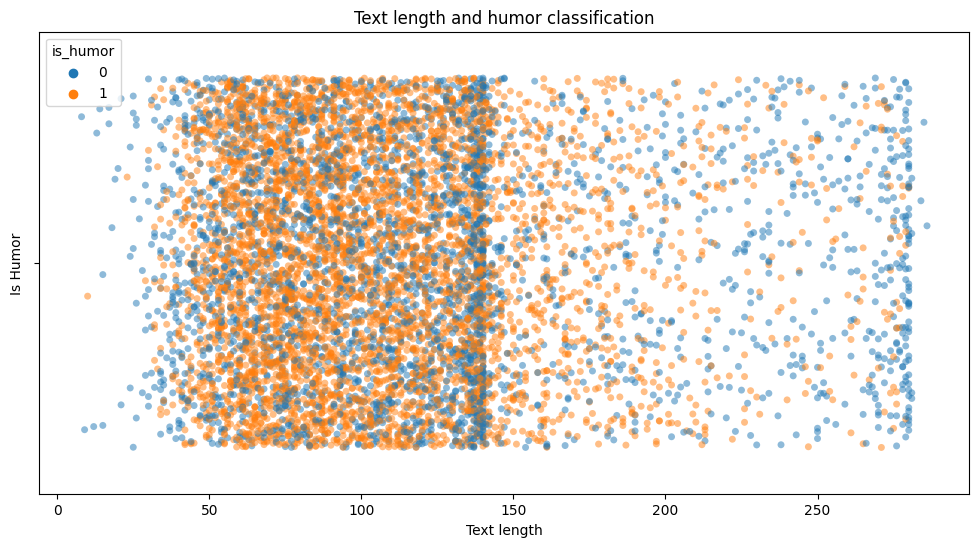

In [154]:
# Plot the stripplot
plt.figure(figsize=(12, 6))
sns.stripplot(x='text_length', data=df, hue='is_humor', jitter=0.4, alpha=0.5)
plt.title('Text length and humor classification')
plt.xlabel('Text length')
plt.ylabel('Is Humor')
plt.show()

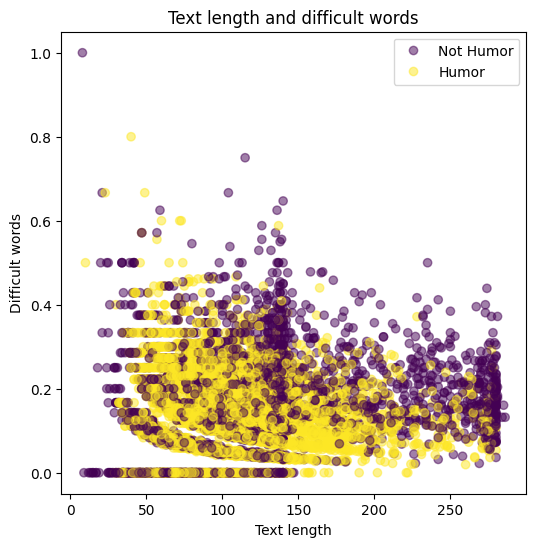

In [155]:
scatter_plot('text_length', 'difficult_words', 'Text length and difficult words', 'Text length', 'Difficult words').show()

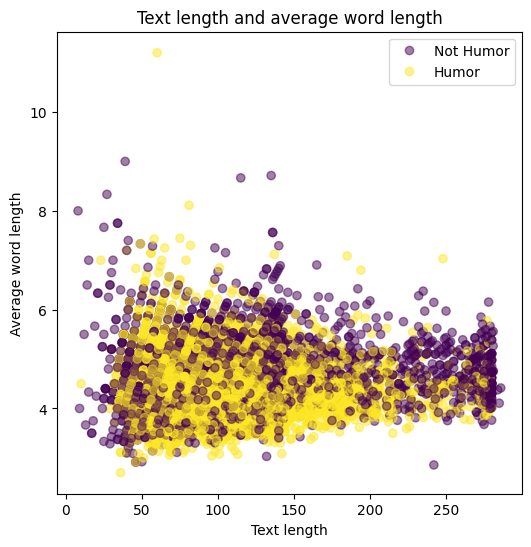

In [156]:
scatter_plot('text_length', 'avg_word_length', 'Text length and average word length', 'Text length', 'Average word length').show()

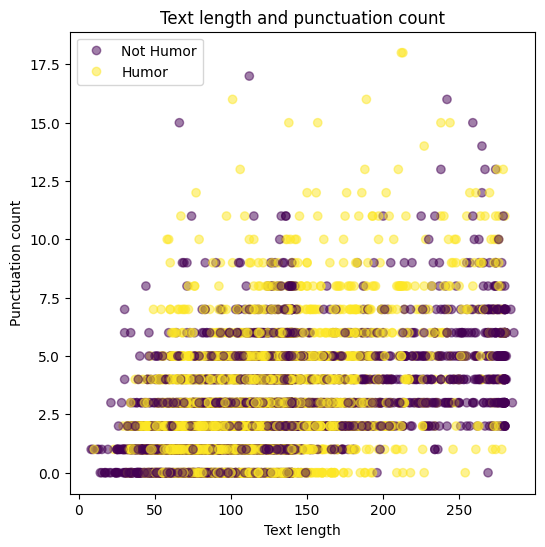

In [157]:
scatter_plot('text_length', 'punctuation_count', 'Text length and punctuation count', 'Text length', 'Punctuation count').show()

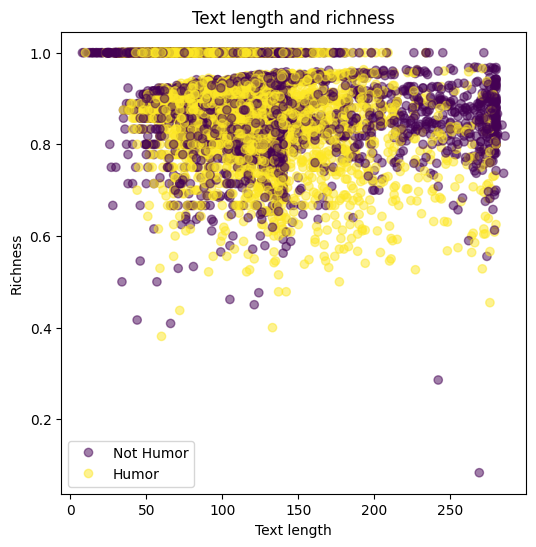

In [164]:
scatter_plot('text_length', 'richenss', 'Text length and richness', 'Text length', 'Richness').show()

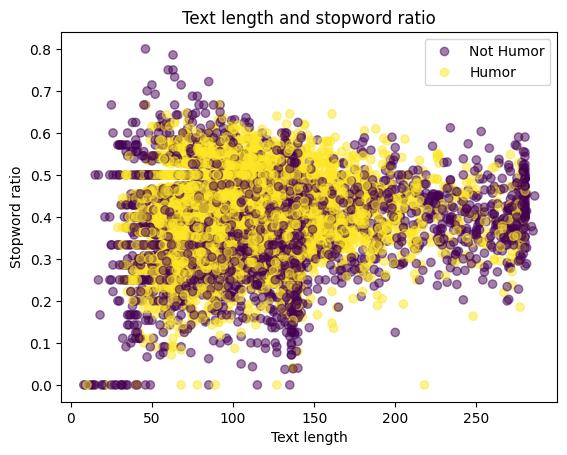

In [ ]:
scatter_plot('text_length', 'stopword_ratio', 'Text length and stopword ratio', 'Text length', 'Stopword ratio').show()

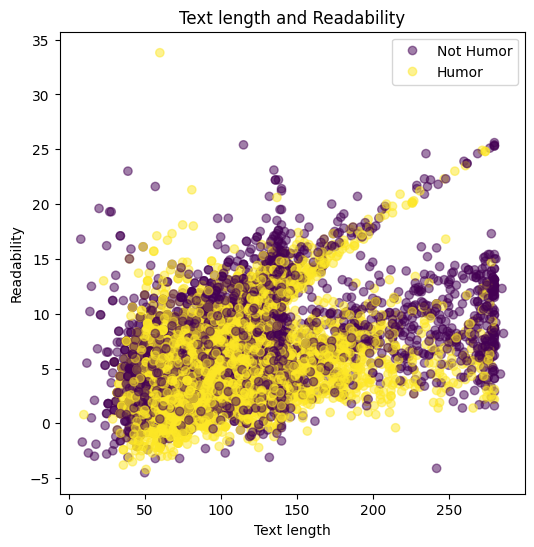

In [165]:
scatter_plot('text_length', 'readability', 'Text length and Readability', 'Text length', 'Readability').show()

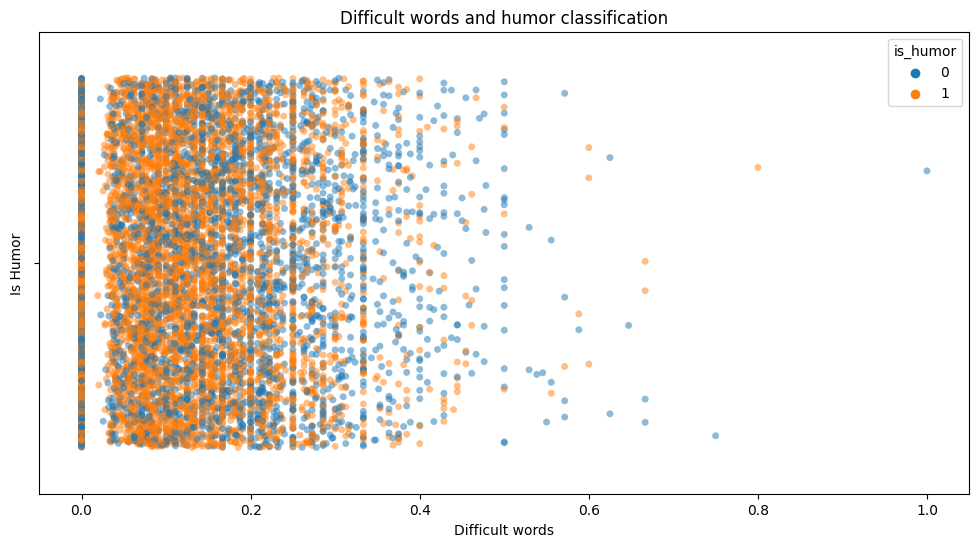

In [161]:
# stripplot of difficult_words
plt.figure(figsize=(12, 6))
sns.stripplot(x='difficult_words', data=df, hue='is_humor', jitter=0.4, alpha=0.5)
plt.title('Difficult words and humor classification')
plt.xlabel('Difficult words')
plt.ylabel('Is Humor')
plt.show()

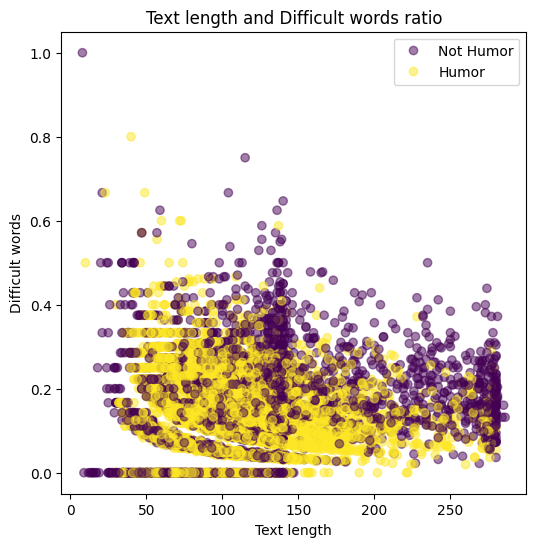

In [167]:
scatter_plot('text_length', 'difficult_words', 'Text length and Difficult words ratio', 'Text length', 'Difficult words').show()